## problem statement

1)Subsidy.inc is the company that delivers the subsidies to the individual based on their income

2)subsidy.inc obbtained the large ammoount of the data on individual income demographic parameter and few finacial parameter

3) so Subsidy.inc wishes us to:

    develop an income classifier system or a model for individual

In [65]:
#to work with the dataframe
import pandas as pd
#to perform the numerical operation
import numpy as np
#to visulize the data
import seaborn as sns
#to partition the data
from sklearn.model_selection import train_test_split
#importing the library for logistic legression
from sklearn.linear_model import LogisticRegression
#importing the performance matrix accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  

#######################################################################################


## importing the data

In [2]:
#importing the data
data_income=pd.read_csv('income(1).csv')
#creating the copy of the orginal data
data=data_income.copy()
# we createdthe copy ofthe data so that the orginal data frame is not be touched so the further anlsyis can be done to copied data
"""
#exploratory data analysis:
#under the exporatary data analysis we are explore the data to understand the data even better
#1.getting to know the data-study about the variables
#2.data preprocessing(missing values)
#cross tables and data visulization
"""



'\n#exploratory data analysis:\n#under the exporatary data analysis we are explore the data to understand the data even better\n#1.getting to know the data-study about the variables\n#2.data preprocessing(missing values)\n#cross tables and data visulization\n'

In [3]:
#getting know about the data
# *********************************************** #
# to check the type of the varible
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [4]:
# checking for the missing values
data.isnull()
print('data coloums with null values\n',data.isnull().sum())

data coloums with null values
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


the above line of code which shows that there would be no missing values in each coloum

the isnull will check the null values in each coloumn

the isnull().sum() it take the sum of the null values in each coloums

In [5]:
#summary of the numerical variables
summary_num=data.describe()
print(summary_num)
#through this we can infer the statistical mearsures from our data 


                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


 these are the numerical variables like age,capitalgain,capitalloss,hoursperweek
it contain the data of 31978 indivduals
the aversge of the individual in the data set is nearly 40
the minimum age of the person is 17 and the maximum is 90
about 25% of the people have the age belong to28
the capital gain means individual who invested in stock or property
the average number of such individuals are nearly 1065


In [6]:
#summery of the catagorical variable
summary_cate=data.describe(include="O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  



this would be the summary of the catagorical variable data

In [7]:
#frequency  of the each catagory
data['JobType'].value_counts()



JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [8]:
data['occupation'].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

so we can see the special charcters(question mark)
these means null values.it can be apperead in only jobtype and the occuption column
so to fill the special charcter by null values

In [9]:
#checking for unique classes
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))


[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [10]:
"""
go back and read the data including the null values "na_values['?' ]
"""
data=pd.read_csv('income(1).csv',na_values=[' ?'])



In [11]:
#data preprocessing
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [12]:


missing=data[data.isnull().any(axis=1)]
#axis 1 is considered atleast one value of column is missing
"""
points to note:
1.missing values in job type=1809
2.missing value in occcupation=1816
3.there were 1809 rows where two specific columns occupation and jobtype have missing values
4.you have still 7 occupayion are unfilled for these  7 rows because jobtype id not working"""

'\npoints to note:\n1.missing values in job type=1809\n2.missing value in occcupation=1816\n3.there were 1809 rows where two specific columns occupation and jobtype have missing values\n4.you have still 7 occupayion are unfilled for these  7 rows because jobtype id not working'

In [13]:
data2=data.dropna(axis=0)
#it drop all the columns where it contain the null values

In [14]:
correlation=data2.corr(numeric_only=True)
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


when you look at the values most of them is equal to zero this means none of the variables correlated each other
beacuse the correlation value lies between -1 to 1
if the correlated value equal to 1 then there would be strong relation between two variables
if the values equal to zero then there is no correlation b\w them
in our case there would e no variables ehich are correlated each other






## cross tables & Data visulization

In [15]:
#extracting the columns name
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [16]:
#*****************************************************#
#gender proporation table
gender=pd.crosstab(index=data2["gender"],
                   columns='count',
                  normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


this would help to identify the male and female percentage in the data set
the male proption is 32% and the female propostion is 67%

In [17]:
#gender vs salary status:
#how salary status varies across the gender
#where we are looking to the relation b\w gender and salary status

gender_salstat=pd.crosstab(index=data2["gender"],
                          columns=data2['SalStat'],
                          margins=True,
                          normalize='index')
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


from this we came to know that only 11% of the females earn greater than 50,000and 88% earn less than 50k
there would be 31% of the male earns greater than 50,000 and 68% earn less than 50.000
the normalize is set to index beacuase the row propostion is equal to 1


C:\Users\91911\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


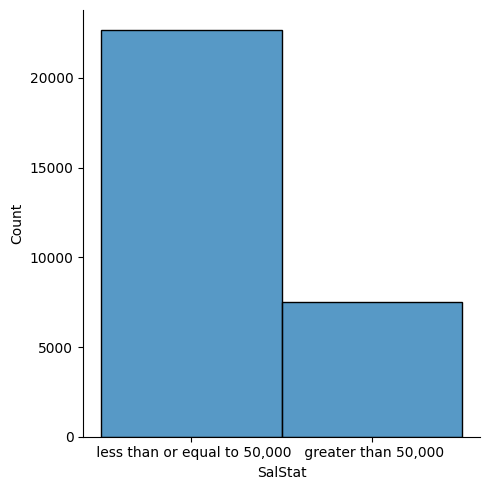

In [18]:
#frequency distributin of salary status
SalStat=sns.displot(data2['SalStat'],)

in this plot we came to know that 75% of the people having the income less than 50,000 income
and 25% of the people having the income more than 50k

C:\Users\91911\AppData\Local\Temp\ipykernel_4168\2945953329.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['age'],bins=10,kde=False)


<Axes: xlabel='age'>

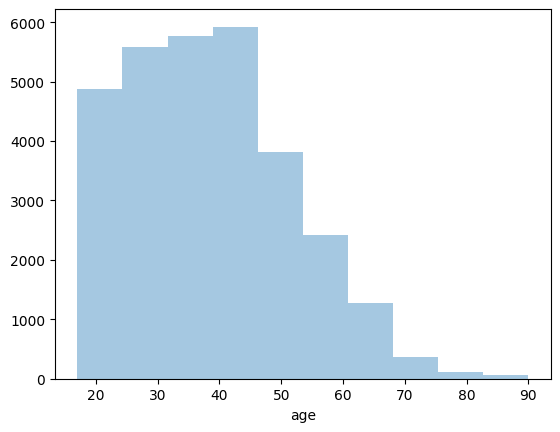

In [19]:
#*********** Histogram of age **********#
sns.distplot(data2['age'],bins=10,kde=False)

from this we came to know that the age from 20-45 having the high frequency

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

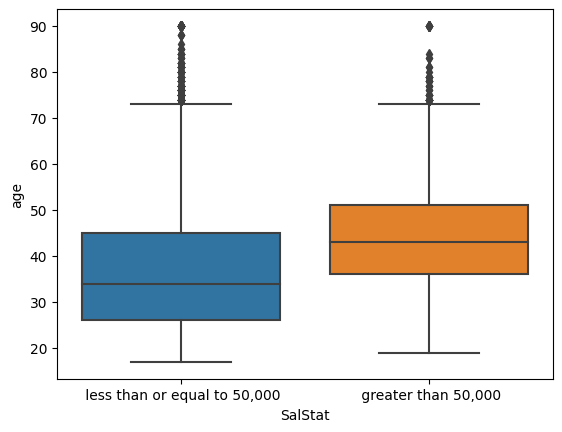

In [20]:
# we can understand the relationship b\w the variables by ploting them
# in order to know how the age is going to affect the salstat
#****************** Box-plot :Age vs Salary  status ****************#
sns.boxplot(x='SalStat',y='age',data=data2)
data2.groupby('SalStat')['age'].median()


this plot will shows people with 25-35 age are more likely to earn <=50000
and the people with 35 to 50 age are more likely to earn >50000

similary you can use the cross table and plots to genrate the relationship b\w the variables

## Logistic regression

In [73]:
# Importing data
# =============================================================================
data = pd.read_csv('income(1).csv',na_values=[" ?"]) 

# =============================================================================
# Data pre-processing
# =============================================================================

data.isnull().sum()

missing = data[data.isnull().any(axis=1)]
# axis=1 => to consider at least one column value is missing in a row

""" Points to note:
1. Missing values in Jobtype    = 1809
2. Missing values in Occupation = 1816 
3. There are 1809 rows where two specific 
   columns i.e. occupation & JobType have missing values
4. (1816-1809) = 7 => You still have occupation unfilled for 
   these 7 rows. Because, jobtype is Never worked
"""

data2 = data.dropna(axis=0)


# Reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

new_data=pd.get_dummies(data2, drop_first=True)

# Storing the column names 
columns_list=list(new_data.columns)
print(columns_list)

# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

# Storing the output values in y
y=new_data['SalStat'].values
print(y)

# Storing the values from input features
x = new_data[features].values
print(x)

# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

# =============================================================================
# KNN
# =============================================================================

# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)  

# Fitting the values for X and Y
KNN_classifier.fit(train_x, train_y) 

# Predicting the test values with model
prediction = KNN_classifier.predict(test_x)

# Performance metric check
confusionMmatrix = confusion_matrix(test_y, prediction)
print(confusionMmatrix)

# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

print('Misclassified samples: %d' % (test_y != prediction).sum())

"""
Effect of K value on classifier
"""
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

print(Misclassified_sample)

C:\Users\91911\AppData\Local\Temp\ipykernel_4168\4021366458.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64
['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Hand